# PRUEBA DE MODELOS - EMBEDDING Y CLASIFICACIÓN

Lo que se pretende en este libro de Jupyter es empezar con las pruebas de algunos modelos que se pudieron obtener de referencia en investigaciones anteriores. Todo esto con el fin de poder tener una mejor noción de estos modelos y en el mejor de los casos, ya tener un modelo definido con el que se trabajará posteriormente. 

Algunos de estos modelos son simplemente de embedding, otros tantos si conllevan algunas técnicas ya avanzadas de clasificación o detección de imágenes, según corresponda. La lista de modelos que se pretende probar es la siguiente:

- OpenL3 (Solo de embedding)

- ViT (de Google)

- Contrastors: Aquí podemos hacer el uso a su vez de dos modelos, CLIP y MRL

- Sports: Lista de varios modelos que nos pueden ayudar con la tarea asignada

- ResNet: Modelo moldeable con el número de capas que éste utiliza, es una red neuronal convolucional

- InceptionV3: Modelo moldeable con el número de capas y parámetros que éste utiliza, es una red neuronal convolucional

Ejemplos de modelos que algunas personas tomaron para la solución del proyecto. Tomado de [aquí](https://www.kaggle.com/competitions/planttraits2024/code)

1. Primer ejemplo: [KerasCV - EfficientNetV2](https://www.kaggle.com/code/awsaf49/planttraits2024-kerascv-starter-notebook#🔍-%7C-Loss-&-Metric)

Aquí en este ejemplo podemos ver los detalles del significado de cada _plant trait_ y qué significa cada uno. Aquí es importante definir algunos parámetros (que también he visto dentro de ViT, por ejemplo, y que son el tamño de las imágenes, epochs, seed, verbose, etc. Aquí también se hace el augmentations de las imágenes (flip, rotation, brightness, etc.), aquí los augmentations se hacen a un batch, lo cual acelera el entrenamiento y reduce el cuello de botella de CPU. 

Dentro del procedimiento de aplicar los augmenters, se ven funciones dentro de funciones, lo cual me confunde un poco. Después del proceso de augmenter, viene un proceso de la decodificación de las imágenes el cual involucra una modificación en el tamaño de la imagen y asignación de etiquetas (aquí hay más del proceso del mejoramiento de la imagen pero es un poco confuso)

Divide la data en 5 conjuntos, después crea segmentos basados en las 6 _plant traits_ y las combina dentro de una columna final de segmento, al final, utiliza este segmento para balancear distribuciones similares de segmentos a través de los conjuntos. 

Antes de entrenar el modelo como tal, se aplica una normalización estándar usando StandardScaler, esto asegura que los features tengan escalas consistentes, el cual es crucial para el desempeño óptimo de las capas lineales o densas --**Build Train & Valid Dataset**--

## Modelo 1: OpenL3

Las especificaciones de este modelo se pueden encontrar en la página de [GitHub](https://github.com/marl/openl3?tab=readme-ov-file) o su [Documentación](https://openl3.readthedocs.io/en/latest/tutorial.html#introduction) oficial. [API Reference](https://openl3.readthedocs.io/en/latest/api.html) 

Papers de referencia:

- [Paper 1: Look Listen and Learn](https://openaccess.thecvf.com/content_ICCV_2017/papers/Arandjelovic_Look_Listen_and_ICCV_2017_paper.pdf)

- [Paper 2: Look, Listen and Learn more: design choices for deep audio embeddings](http://www.justinsalamon.com/uploads/4/3/9/4/4394963/cramer_looklistenlearnmore_icassp_2019.pdf)


Los parámetros para los métodos de este modelo son los siguientes:

- content_type: "env", "music" (default). "music" es para videos, imágenes o música

- input_repr: "linear", "mel128" (default), "mel256"

- embedding_size: 512, 8192 (default). Tamaño del array resultante con el embedding de la imagen

Si el embedding ya existe, entonces no crea uno nuevo, deja el "original"

Para este modelo, existen 3 posibilidades:

1. Puedes ejecutar el modelo directamente a una imagen (o lista de imágenes) con el método "get_image_embedding"

2. Puedes guardar el embedding en la misma carpeta de donde viene la imagen para un uso posterior. Para guardar el embedding es el método "process_image_file" y para cargarlo es el método "np.load" con np la librería "numpy"

3. Puedes pre cargar desde un principio el modelo para que no estés cargandolo cada que lo requieras para una imagen. El método para pre cargar el modelo es "openl3.models.load_image_embedding_model", después, para usarlo en los métodos de los puntos anteriores, pasas el modelo con el argumento "model"

- Del método "imread" obtuvimos un array de matrices sobre la imagen

- De los métodos de openl3, los argumentos significan lo siguiente:

     1. input_repr: Representación del espectograma usado por el modelo. Es ignorado si el parámetro "modelo" es un modelo de tipo Keras válido. "linear-frequency log-magnitude spectogram", "Mel-frequency log-magnitude spectogram": este último captura información perceptivamente relevante de manera más eficiente con menos bandas de frecuencia (128 o 256 bandas) que el espectograma lineal

    2. content_type: Tipo de contenido utilizado para entrenar el modelo de embedding. Es ignorado si el parámetro "modelo" es un modelo de tipo Keras válido. "music" se refiere a contenido de música como tal, instrumentos, tonos, etc; "env" es de environmental y se refiere a sonidos humanos o de la naturaleza, aquellos que son reproducidos de manera "natural"

    3. embedding_size: Dimensión que tendrá el embedding. Es ignorado si el parámetro "modelo" es un modelo de tipo Keras válido

- Consideraciones extras sobre el modelo (obtenidas de los papers correspondientes):

    1. El espectrograma "Mel" captura información de manera más eficiente con menos bandas de frecuencia comparado con el espectrograma lineal, por eso siempre es mejor utilizar este argumento "Mel" a la hora de utilizar el modelo

    2. En la realización del modelo se utilizó el optimizador Adam para minimizar la pérdida de la entropia cruzada binaria con regularización L2
 
    3. Para las pruebas estadísticas del modelo se utilizó la Prueba de rangos de Wilcoxon
 
    4. El modelo L3 no requiere data con etiquetas, la representación Mel es la mejor dentro de este modelo
 
    5. El modelo L3 es no supervisado y aprende información a partir de entradas de de audio y visual al mismo tiempo
 
    6. Dentro de este modelo se utiliza la técnica de Activation Visualization el cual sirve para reconocer las regiones exactas de donde surgen los audios o videos, sus origenes.
 
- Al final, se pudo ejecutar el modelo de manera correcta y se tiene ya un mejor y mayor entendimiento del rendimiento y uso del modelo.

- **NOTA: Al ejecutar la función me sale un aviso de que estoy ejecutando una función costosa y me da los siguientes consejos para evitar estos cargos excesivos: Poner como argumento "reduce_tracing = True" o consultar documentación de TensorFlow [Doc1](https://www.tensorflow.org/guide/function#controlling_retracing) [Doc2](https://www.tensorflow.org/api_docs/python/tf/function)

In [11]:
#Librerias a utilizar en todo este proceso

#!pip install openl3

import openl3
from skimage.io import imread
import functions.general_functions as gf
import os

#Los embeddings se pueden leer con numpy
import numpy as np

ERROR: Could not find a version that satisfies the requirement tentensorflow<1.14 (from versions: none)
ERROR: No matching distribution found for tentensorflow<1.14


### 1.1 Aplicación directa del modelo

In [2]:
#Pre cargamos el modelo, al hacerlo solo una vez no es necesario pre cargar el modelo cada vez que se va a utilizar
modelo = openl3.models.load_image_embedding_model(input_repr="mel256", content_type="music", embedding_size=512)

#Variable global, de donde obtenemos la ruta de las imágenes de entrenamiento y prueba
ruta_imagenes_train = gf.get_data_path('train_images')
ruta_imagenes_test = gf.get_data_path('test_images')

In [3]:
#Método para generar los embeddings de manera directa a una sola imagen

#Nombre de la imagen a la cual aplicaremos el modelo
imagen_name = '993123.jpeg'

#Leemos la imagen
imagen1 = imread(ruta_imagenes_train + imagen_name)
#Generamos el embedding de la imagen de manera directa
emb = openl3.get_image_embedding(imagen1, content_type="env", input_repr="linear", embedding_size=512)

emb

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


array([[ 1.175706  ,  1.5434446 ,  1.8470824 ,  1.6111743 ,  3.9059458 ,
         1.6161033 ,  1.1251589 ,  1.8484113 ,  1.2820483 ,  1.2422009 ,
         1.2345903 ,  0.83172244,  1.2606227 ,  1.6085217 ,  2.310515  ,
         1.9807837 ,  2.63912   ,  1.8400848 ,  1.7005421 ,  1.7075837 ,
         1.0354801 ,  2.1518202 ,  0.6044424 ,  1.4306686 ,  0.98116654,
         0.777962  ,  3.3654976 ,  4.162442  ,  1.9882624 ,  0.7811913 ,
         2.5927725 ,  1.8348336 ,  1.7911009 ,  1.8612864 ,  2.2643867 ,
         2.5106506 ,  1.129749  ,  0.7803635 ,  1.5808517 ,  2.0452437 ,
         0.7477303 ,  2.566805  ,  1.2202104 ,  2.673956  ,  1.3030437 ,
         0.9613706 ,  1.4589942 ,  1.1933473 ,  1.6517575 ,  1.4095986 ,
         1.3867158 ,  1.8570193 ,  3.5165267 ,  1.0719959 ,  0.7293594 ,
         2.3112679 ,  0.84064364,  2.1612198 ,  3.0060468 ,  1.9224309 ,
         1.1812272 ,  1.891209  ,  2.472405  ,  1.2888657 ,  1.6927787 ,
         2.1506999 ,  1.3459386 ,  2.0038981 ,  1.5

### 1.2 Guardar Embedding para uso futuro (Varisas imágenes)

In [4]:
#Aplicación del modelo a más de una imagen

#Rutas finales de las imágenes a procesar

imagen2 = ruta_imagenes_train + '998892.jpeg'
imagen3 = ruta_imagenes_train + '994535.jpeg'
#Lista para guardar todas las imágenes
imagen_array = [imagen2, imagen3]
#Método para guardar los embeddings de cada imagen en la misma carpeta de donde vienen las imágenes
openl3.process_image_file(imagen_array, batch_size = 32)

openl3: Processing /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/998892.jpeg (1/2)
openl3: /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/998892.npz exists, skipping.
openl3: Processing /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/994535.jpeg (2/2)
openl3: /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/994535.npz exists, skipping.


In [5]:
#En este método se leerán los embeddings de las imágenes generadas en la sección anterior

#Cargamos la data (embedding) de la imagen especificada
data = np.load(ruta_imagenes_train + '998892.npz')
#Obtenemos solo el embedding
emb = data['embedding']

emb[0]

array([-0.17171964,  2.7841794 ,  0.58611256, ...,  0.55718577,
        1.9009621 ,  1.2161709 ], dtype=float32)

In [6]:
#En esta sección se aplica el embedding a 10 imágenes distintas dentro de la carpeta de train images de manera directa

#Obtenemos la lista con los nombres (id's) de las imágenes de entrenamiento
train_file_names = os.listdir(ruta_imagenes_train)
#Nos quedamos solo con las primeras 10 imágenes
train_file_names = train_file_names[:10]

#Concatenamos el resto de la ruta del archivo al nombre de cada imagen
train_complete_file_names = [ruta_imagenes_train + x for x in train_file_names]

#Método para guardar los embeddings de cada imagen en la misma carpeta de donde vienen las imágenes
openl3.process_image_file(train_complete_file_names, batch_size = 32)

#Empezamos con el proceso de cargar los embeddings de cada imagen

#Lista en donde se guardará cada embedding
embs_files = list()
#Loop para ir guardando cada embedding
for imagen in train_file_names:
    #Cargamos la data (embedding) de la imagen especificada
    data = np.load(ruta_imagenes_train + imagen[:imagen.find('.')] + '.npz')
    #Obtenemos solo el embedding
    embs_files.append(data['embedding'][0])

embs_files[0]

openl3: Processing /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/174383279.jpeg (1/10)
openl3: /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/174383279.npz exists, skipping.
openl3: Processing /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/194747578.jpeg (2/10)
openl3: /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/194747578.npz exists, skipping.
openl3: Processing /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/196588153.jpeg (3/10)
openl3: /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/196588153.npz exists, skipping.
openl3: Processing /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/8324721.jpeg (4/10)
openl3: /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/8324721.npz exists, skipping.
openl3: Processing /Users/pedrovela/Docs/Datasets - ML/planttraits2024/train_images/179983287.jpeg (5/10)
openl3: /Users/pedrovela/Docs/Datasets - ML/planttrait

array([-0.47553322,  2.9182515 , -0.14319089, ...,  0.74044186,
        2.1243396 , -0.49356037], dtype=float32)

### 1.3 Uso del modelo pre cargado

In [7]:
#Método en el cual generamos el embedding de la imagen ya con el modelo pre cargado

#Obtenemos el embedding final
emb = openl3.get_image_embedding(imagen1, model=modelo)
emb

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


array([[-0.20485121,  2.7495792 ,  1.1525512 ,  1.6354275 ,  1.5630054 ,
         3.0043402 ,  1.1680847 ,  0.20437273,  0.47765186,  1.6069542 ,
         0.99042135,  2.744746  ,  3.0113118 ,  0.697831  ,  2.5043488 ,
         2.8977034 ,  2.1103582 ,  1.0919865 ,  2.5187943 ,  2.6752896 ,
         2.5137546 ,  0.80452126,  0.9297262 ,  2.2770233 ,  2.8381968 ,
         0.6253177 ,  0.7834051 ,  1.436738  ,  1.1495699 ,  1.3403784 ,
         1.7564527 ,  1.0250019 ,  2.2259736 ,  0.5685906 ,  2.5769222 ,
         0.8931727 ,  2.3390589 ,  1.2697175 ,  1.2542069 ,  1.3876815 ,
         1.3700166 ,  1.7157243 ,  0.76253283,  1.8189112 ,  0.24554229,
         1.335274  ,  1.7735906 ,  1.3587192 ,  1.4913703 ,  1.041074  ,
         0.53341097,  0.9961289 ,  0.8008581 ,  1.6766714 ,  1.8453351 ,
         1.4003036 ,  1.7122384 ,  1.1727496 ,  1.851693  ,  2.0431597 ,
         2.2497199 ,  1.0162674 ,  2.1898563 ,  1.1334101 ,  0.64272827,
         1.9252778 ,  2.6810825 ,  1.1118598 ,  2.4

## Modelo 2: ViT (Google)

[GitHub](https://github.com/lukemelas/PyTorch-Pretrained-ViT?tab=readme-ov-file) , [Colab](https://colab.research.google.com/drive/1muZ4QFgVfwALgqmrfOkp7trAvqDemckO?usp=sharing)

Papers de referencia:

- [AN IMAGE IS WORTH 16X16 WORDS: TRANSFORMERS FOR IMAGE RECOGNITION AT SCALE](https://openreview.net/pdf?id=YicbFdNTTy)

- [MLP-Mixer: An all-MLP Architecture for Vision](https://arxiv.org/pdf/2105.01601)
 
- [How to train your ViT? Data, Augmentation, and Regularization in Vision Transformers](https://arxiv.org/pdf/2106.10270)
   
- [Attention Is All You Need](https://arxiv.org/pdf/1706.03762v7)

Proceso general del modelo:

1. Considera una imagen como una secuencia mono-dimensional (1 dimensión) de parches (token embeddings)
  
2. Antepone un token de clasificación a la secuencia generada en el punto 1

3. Pone estos parches a través de un codificador transformador (como BERT)

4. Pasa el primer token del output generado por el transformador a través de un pequeño MLP (Multilayer Perceptron) para obtener los logits de clasificación. Deja una capa escondida para pre-entrenamiento y una sola capa lineal para el fine-tunning

Puntos sobre la lectura:

- Se divide una imagen en parches y provee la secuencia de embeddings lineales de esos parches como entrada a un Transformador

- Los parches son tratados como Tokens (palabras) en una aplicación NLP

- El encoder Transformer consiste en alternar capas de multiheaded self-attention (MSA) y bloques MLP

- En este modelo existen dos tipos de capas: las capas MLP y MSA

- La longitud de la secuencia del Transformador es inversamente proporcional al cuadrado del tamaño del parche, por lo que modelos con tamaños pequeños de parches son computacionalmente más caros

- Aquí también se utiliza el optmizador Adam (la otra alternativa es SGD), es un optimizador estocástico. También existe el optmizador RAdam que brinda mejor control en la varianza del gradiente, el cual es necesario cuando el modelo se entrena a un valor alto de LR; RAdam detecta inestabilidad en la varianza y cambia el LR de manera suave para evitar la divergencia en las etapas iniciales del entrenamiento.

- **Adam (Adaptive Moment Estimation)**: Combina el optimizador RMSProp (Root Mean Square Propagation) con el Momentum. $\beta_1$ es el factor de olvido del gradiente y $\beta_2$ es el factor de olvido del segundo momento del gradiente

- **FLOPs (Floating Point Operations)**: Métricas que se utilizan comúnmente para calcular la complejidad computacional de los modelos de deep learning, sirve para entender fácilmente el número de operaciones aritméticas requeridas para realizar cierta operacion computacional. Número de operaciones de punto flotante (suma, resta, multiplicación y división en números de punto flotante). Al optimizar esta métrica podemos reducir la energía requerida para correr nuestra red neuronal [Ref 1](https://www.kdnuggets.com/2023/06/calculate-computational-efficiency-deep-learning-models-flops-macs.html) [Ref 2](https://medium.com/@pashashaik/a-guide-to-hand-calculating-flops-and-macs-fa5221ce5ccc)

- **EPOCH**: Se refiere al pase entero del conjunto de datos de entrenamientoa través de los algoritmos. Es un hiper-parametro que determina el proceso de entrenar el modelo entero de ML. Es cuando pasas TODO tu conjunto de entrenamiento a través del modelo y entonces se define como el número total de iteraciones que tuvo todo tu conjunto de entrenamiento para entrenar el modelo de ML, un "paso" de la data de entrenamiento se toma en cuenta cuando ésta haya pasado tanto por delante como por detrás en todos los procesos del modelo. Un epoch está completo cuando ha procesado todos los _batches_ y ha actualizado sus parámetros basados en el cálculo de pérdida. De manera general, incrementando el número de epochs mejora el performance del modelo al permitirle aprender comportamientos más complejos en la data, pero si existen muchos epochs, el modelo se sobre-entrena. Iteración completa: Procesar cada batch de la data de entrenamiento, calcular la pérdida y actualizar los parámetros del modelo. Ayuda a procesar o entrenar el modelo con un conjunto enorme de datos, si se tiene un conjunto enorme de datos y no es posible entrenar todos los datos de una sola vez (debido a memoria), los epochs te permiten entrenar el modelo en mini batches independientes que se realiza uno por uno. [Ref 1](https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-epoch-in-machine-learning#:~:text=Machine%20learning%20models%20are%20trained,training%20data%20through%20the%20algorithm.) [Ref 2](https://www.geeksforgeeks.org/epoch-in-machine-learning/)

- **LEARNING RATE WARMUP**: Proceso para mejorar la optimización del modelo; incrementa gradualmente la taza (rate) de aprendizaje (tamaño del paso tomado en cada iteración para actualizar los parámetros del modelo) durante las etapas iniciales del entrenamiento antes de iniciar con las tazas de aprendizaje programadas; se incrementa linealmente la taza de aprendizaje durante las iteraciones iniciales y después se continua con las tazas programadas de aprendizaje. Se necesita ajustar los parámetros del calentamiento (warm-up) basado en características específicas del modelo y conjunto de datos. [Ref 1](https://techkluster.com/technology/learning-rate-warm-up/#:~:text=Learning%20rate%20warm%2Dup%20involves,how%20it%20can%20be%20implemented.) [Ref 2](https://www.baeldung.com/cs/learning-rate-warm-up)

- **SGD (Stochastic Gradient Descent)**: Método iterativo para optimizar la función objetivo con propiedades de suavidad adecuadas (diferenciabilidad, sub-diferenciabilidad), puede ser tomado como la aproximación estocástica de la técnica gradiente descendiente, ya que reemplaza el actual gradiente por otro gradiente estimado a partir de un subconjunto aleatorio de la data. Aquí, dentro del proceso de optimización de la función objetivo, en vez de calcular el verdadero gradiente de la función, lo que se hace es estimar ese gradiente con el gradiente de un solo registro o muestra, después actualiza este valor para cada entrada (muestra) del conjunto de entrenamiento hasta que se logra la conversión. Aquí se beneficia el costo computacional por iteración, aunque de manera general toma un número más alto de iteraciones que el método tradicional de gradiente descendiente. Este método es mejor para casos en donde el conjunto de datos es grande. Una elección de un valor alto de LR puede llevar a que el modelo tome pasos grandes en cada iteración y "pase" de largo el valor mínimo y una elección de LR baja puede ocasionar que el modelo converga lentamente. [Ref 1](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) [Ref 2](https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/) [Ref 3](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31) [Ref 4](https://scikit-learn.org/stable/modules/sgd.html)

- fine-tunning con SGD con momentum de 0.9, el fine-tunning general del modelo se hace con una resolución de 384 (a menos que se estipule otra cosa). EL Vision Transformer se beneficia con mejores resoluciones.

- SGD con momentum recuerda la actualización del cambio en el parámetro w que minimiza la función objetivo en cada iteración y determina la sig. actualización del parámetro como una combinación lineal del gradiente y la actualización anterior. Utiliza un factor de decadencia entre 0 y 1 que determina la contribución relativa del actual gradiente y gradientes anteriores con respecto al cambio en los pesos. 

Rápida descripción de la inspección interna de ViT:

1. La primera capa de ViT proyecta linealmente los parches aplanados a un espacio con dimensión menor

2. Se agrega una posición de embedding a cada parche. El modelo aprende a calcular la distancia (similitud) entre las imagenes con respecto a su posición de embedding; parches cercanos tienden a tener posiciones de embeddings más similares. Esta distancia es de coseno entre la posición del embedding del parche de un determinado renglón y columna y la posición del embedding de los demás parches. Parches que se encuentran en la misma columna o renglón tienen embeddings similares

3. Una estructura sinusoidal (de tipo seno) se utiliza típicamente para mallas grandes

4. Self-attention permite a ViT integrar información a través de toda la imagen, incluso en las capas más bajas. Es una distancia que se mide entre el pixel de consulta (query) y los demás pixeles, todas con un peso de atención (weight). Mientras la capa sea más baja (profunda), la atención que se le da a la imagen es mayor.

5. El modelo atiende a regiones de la imagen que son semánticamente relevantes para la clasificación


**TRATAR DE REPLICAR ESTOS EJEMPLOS:** [Kaggle Example](https://www.kaggle.com/code/raufmomin/vision-transformer-vit-from-scratch) [Medium Example](https://medium.com/@diego.machado/fine-tuning-vit-for-image-classification-with-hugging-face-48c4be31e367) [Busqueda de Google (referencias)](https://www.google.com/search?q=using+vit+model+with+csv+file&client=safari&sca_esv=41a53a54b5bc3fc7&sca_upv=1&sxsrf=ADLYWIL7bNtclYzSlPXpYVpatUTD_zwpYw%3A1723677174417&source=hp&ei=9jm9Zry5F-7HkPIPiLy8iAo&iflsig=AL9hbdgAAAAAZr1IBha6iJ9JBpkWgf9h1nv91qK1KZIl&ved=0ahUKEwi8jL_tzfWHAxXuI0QIHQgeD6EQ4dUDCBY&uact=5&oq=using+vit+model+with+csv+file&gs_lp=Egdnd3Mtd2l6Ih11c2luZyB2aXQgbW9kZWwgd2l0aCBjc3YgZmlsZTIFECEYoAFIsj9QAFjZPnAAeACQAQCYAZ0BoAG_GKoBBDYuMjK4AQPIAQD4AQGYAhugArIYwgIKECMYgAQYJxiKBcICBBAjGCfCAg4QABiABBixAxiDARiKBcICERAuGIAEGLEDGNEDGIMBGMcBwgILEC4YgAQYsQMYgwHCAgsQABiABBixAxiDAcICBRAAGIAEwgIREC4YgAQYsQMYxwEYjgUYrwHCAggQLhiABBixA8ICCBAAGIAEGLEDwgIFEC4YgATCAg4QLhiABBjHARiOBRivAcICChAAGIAEGLEDGArCAgsQLhiABBjHARivAcICDRAAGIAEGLEDGEYY_wHCAgYQABgWGB7CAgcQABiABBgTwgIJEAAYgAQYExgKwgIIEAAYExgWGB7CAgQQIRgVmAMAkgcEMy4yNKAH734&sclient=gws-wiz)

El siguiente ejemplo se tomó de [GitHub](https://github.com/lukemelas/PyTorch-Pretrained-ViT?tab=readme-ov-file)

In [2]:
#Librerias a importar

#!pip3 install pytorch_pretrained_vit

from pytorch_pretrained_vit import ViT
model = ViT('B_16_imagenet1k', pretrained=True)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 29.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 20.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 4.5 MB/s eta 0:00:00
  Created wheel for pytorch_pretrained_vit: filename=pytorch_pretrained_vit-0.0.7-py3-none-any.whl size=11114 sha256=9f5a18f9e5c23c5849b1b1a6b48aaaf0e5b85aafac1e211526c97205ad4ea5e6
  Stored in directory: /Users/pedrovela/Library/Caches/pip/wheels/79/c8/4f/9ad72c6f247a7e6888cc7767db9632675cf82656fffec85518
Successfully built pytorch_pretrained_vit


Downloading: "https://github.com/lukemelas/PyTorch-Pretrained-ViT/releases/download/0.0.2/B_16_imagenet1k.pth" to /Users/pedrovela/.cache/torch/hub/checkpoints/B_16_imagenet1k.pth
100%|████████████████████████████████████████| 331M/331M [00:08<00:00, 38.7MB/s]


Loaded pretrained weights.


In [7]:
#!pip3 install torchvision

import json
from PIL import Image
import torch
from torchvision import transforms

from functions import general_functions as gf

ruta_imagenes_train = gf.get_data_path('train_images')
img_name = ruta_imagenes_train + '993123.jpeg'

# Load ViT
from pytorch_pretrained_vit import ViT
model = ViT('B_16_imagenet1k', pretrained=True)
model.eval()

# Load image
# NOTE: Assumes an image `img.jpg` exists in the current directory
img = transforms.Compose([
    transforms.Resize((384, 384)), 
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])(Image.open(img_name)).unsqueeze(0)
print(img.shape) # torch.Size([1, 3, 384, 384])

# Classify
with torch.no_grad():
    outputs = model(img).squeeze(0)
print(outputs.shape)  # (1, 1000)

Loaded pretrained weights.
torch.Size([1, 3, 384, 384])
torch.Size([1000])


In [8]:
outputs

tensor([ 4.1168e-02, -3.6647e-01, -8.2826e-02, -5.2003e-03, -6.9432e-01,
         6.3112e-01,  1.1538e-01, -9.5176e-01, -2.8889e-01,  1.1204e-01,
         9.6513e-01, -3.8003e-01, -2.1552e-01, -6.1709e-01,  8.0917e-01,
        -2.5889e-01,  5.4547e-02, -1.1185e+00, -5.8974e-01, -3.2512e-01,
        -2.5198e-01,  5.5554e-01, -2.1421e-02,  3.8290e-01, -2.5087e-02,
         1.9608e+00,  3.3388e+00,  2.1743e+00,  1.2444e+00,  8.5103e-01,
         9.4214e-01,  1.1039e+00,  2.9827e+00, -1.2655e+00,  3.1554e-01,
         9.3914e-01,  8.1178e-01,  4.6449e-01,  2.8589e+00,  3.0353e-01,
         1.3648e+00,  3.1621e+00,  7.6384e-01,  1.6017e+00,  2.9447e+00,
         1.9694e+00,  1.7545e+00,  2.4520e+00, -8.3982e-03,  6.9470e-02,
        -5.9563e-01, -4.6310e-01,  3.2046e+00,  2.7494e+00,  2.3458e+00,
         1.7325e+00,  2.8559e+00,  1.9144e+00,  9.2152e-01,  2.1196e+00,
         1.6230e+00,  9.6469e-01,  1.4489e+00,  1.3848e+00,  1.8677e+00,
         6.0899e-01,  1.9174e+00,  2.1616e+00,  2.7

In [11]:
torch.topk(outputs, k=4).indices.tolist()

[322, 311, 70, 320]

In [12]:
torch.softmax(outputs, -1)[322].item()

0.04724839702248573

El siguiente ejemplo se tomó de [Kaggle](https://www.kaggle.com/code/raufmomin/vision-transformer-vit-from-scratch)

In [5]:
#Importamos las librerias a utlizar

#!pip3 install tensorflow_addons
#!pip3 install --upgrade typing-extensions==4.5
#!pip3 install --upgrade tensorflow==2.13
#!pip3 install 'keras<3.0.0' mediapipe-model-maker

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow_addons as tfa
import glob, random, os, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print('TensorFlow Version ' + tf.__version__)

def seed_everything(seed = 0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed_everything()
warnings.filterwarnings('ignore')

TensorFlow Version 2.13.0


FUNCION DE PARECIDO, PUEDE SER LA FUNCION EUCLIDIANA, COSENO (TE QUEDA AL REVÈS) CUANDO COINCIDE VALE 1 Y CUANDO NO, VALE 0. TENGO LOS EMBEDDINGS. EN UNA CIERTA CAPA DE LA RED TENGO CIERTOS COMPONENTES PRINCIPALES. RED DE REGULARIZACIONES PARA QUE NO SE TE SALTEN EN LAS CAPAS.

PROBLEMA DE CLASIFICACION, MUESTRA DE TRAIN, UNA DE TEST. TENGO UNA IMAGEN DE TEST, LA TRUNCO, SACO LOS RESULTADOS Y OBTENDO SIMILITUDES. SE PUEDE METER EN EL ARQUETIPO A PRIORI. COMO HACER UNA METRICA PARA QUE SE PAREZCA 

TEXTO DESTRUCTURADO, BASE DE DATOS DE GRAFOS (GRAFOS), LO METES RFLIP.

CONTRUIR LOS ARQUETIPOS, NIVEL AL CUAL ESTOY CRTANDO LA RED Y LA METRICA PARA LA COMPARACION. ETIQUETAS: LO QUE ESTOY VIENDO ES QUE ESA MUESTRA A QUE CLUSTER CORRESPONDE. ENTRENAR EL MODELO CON IMAGENES "EQUIS" DE PERROS, ANIMALES, ETC, ETC. PARA TENERLO SUPERVISADO EN EL ENTRENAMIENTO, IR POR FASES Y UNA VEZ QUE HAYA AGARRADO VELOCIDAD ENTONCES SI METERLE LO DE LAS PLANTAS. SEMISUPERVISADO -> IR ALARGANDOLO PARA QUE VAYA APRENDIENDO DE DIFERENTES RAMAS. 

DEEP LEARNING MUY PODEROSO.



## Prueba extra: Solución de Kaggle

Aquí se va a probar una solución proveída por el equipo de Keras dentro del mismo reto de Kaggle. Esto con el fin de poder entender como se puede ir aplicando el modelo y el propósito es que de aquí se van obteniendo vertientes diferentes.

Primero, se probará si es que se puede replicar con mis propios recursos la misma solución para ver si es factible desde mis recursos.

Una vez que tenga la confirmación de que puedo replicar la solución con mis recursos, entonces se investigará que parte(s) es la que puedo editar para tener algo diferente y de ahí ir obteniendo mi proyecto.

Ya que tengo la teoría investigada de mi lado entonces si entraríamos en la fase de experimentación

[Referencia en página de Kaggle](https://www.kaggle.com/code/awsaf49/planttraits2024-kerascv-starter-notebook#🔍-%7C-Loss-&-Metric)

**OTRAS REFERENCIAS:**

[Keras CV Models](https://keras.io/api/keras_cv/models/)

[Train an image classifier from scratch - Keras CV](https://keras.io/guides/keras_cv/classification_with_keras_cv/)

[Learning Rate Schedulers](https://github.com/Mr-TalhaIlyas/Learning-Rate-Schedulers-Packege-Tensorflow-PyTorch-Keras?tab=readme-ov-file)

[SGDR](https://arxiv.org/pdf/1608.03983)

[batch function doc](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch)

[StratifiedKFold - Medium](https://medium.com/@literallywords/stratified-k-fold-with-keras-e57c487b1416)

[StratifiedKFold - scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

[StratifiedKFold - Visualization](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)

### Replicación de la solución

En la solución publicada de Kaggle, el modelo que utlizan es **EfficientNev2** (áre ade oportunidad para cambiar de modelo?). 

Partes (pasos) esenciales para la ejecución de este proyecto:

- Designing a data pipeline for a multi-input and multi-output model.
- Creating random augmentation pipeline with KerasCV.
- Loading the data efficiently using tf.data.
- Creating the model using KerasCV presets.
- Training the model.
- Inference and Submission on test data.

In [11]:
#Instalación de las librerías necesarias a utilizar

#!pip3 install keras_cv==0.8.2 --no-deps
#!pip3 install tensorflow==2.15.0 --no-deps
#!pip3 install keras==3.0.4 --no-deps

#Importamos las librerias que vayamos a necesitar

import os
os.environ["KERAS_BACKEND"] = "jax" #Aqui el autor dice que también podemos utilizar tensorflow o torch (ÁREA DE OPORTUNIDAD)

import keras_cv
import keras
from keras import ops
import tensorflow as tf

import cv2
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import joblib

import matplotlib.pyplot as plt

#Funciones creadas para facilitar algunos procesos
import functions.general_functions as gf

In [12]:
#Imprimimos las versiones de las librerias a utilizar 

print("TensorFlow", tf.__version__)
print("Keras",keras.__version__)
print("KerasCV",keras_cv.__version__)

TensorFlow 2.15.0
Keras 3.0.4
KerasCV 0.8.2


In [13]:
#Iniciamos con la fase de configuración: Diseño de un data pipeline para un modelo con entradas y salidas múltiples

#Configuración de la clase CFG:

class CFG:
    verbose = 1 #Parámetro que configura la manera en que el proceso de entrenamiento es presentado para cada epoch. 0 = silencioso (no muestra nada), 1 = se muestra cada epoch separado por barra, 2 = se muestra solo el número de epoch
    seed = 42 #Semilla que se utiliza para poder reproducir resultados similares en cada ejecución
    preset = "efficientnetv2_b2_imagenet" #Nombre del clasificador pre entrenado, ÁREA DE MEJORA. También se puede utilizar modelos como CSPDarkNet, densenet, EfficientNetV2 (otras vertientes), MiT, MobileNetV3, ResNetV1, YOLO, VitDet
    image_size = [224, 224] #Tamaño de la imagen de entrada del modelo , ÁREA DE MEJORA, investigar que otros tamaños podemos utilizar y como es que cambia los resultados con otros tamaños -> posible efecto que tiene el tamaño de la imagen en los resultados del modelo
    epochs = 12 #Epochs para el entrenamiento -> Número total de iteraciones que tuvo todo tu conjunto de entrenamiento para entrenar el modelo de ML, un "paso" de la data de entrenamiento se toma en cuenta cuando ésta haya pasado tanto por delante como por detrás en todos los procesos del modelo. Incrementando el número de epochs mejora el performance del modelo al permitirle aprender comportamientos más complejos en la data, pero si existen muchos epochs, el modelo se sobre-entrena
    batch_size =  96 #Tamaño del batch -> Un batch es un subconjunto/grupo del conjunto completo de entrenamiento, también se pueden definir como muestras del conjunto de entrenamiento, esto para mejorar el proceso de un conjunto enorme de datos en grupos "pequeños" de datos
    lr_mode = "step" #Tipo de Learning Rate Scheduler y puede ser entre "cos", "step" o "exp". "step" = Step Decay (empieza a deacer el LR después de ciertos epochs mediante un factor lr_decay), "exp" = Exponential Decay (empieza a decaer el LR de manera exponencial), "cos" = Cosine Decay (el LR empieza a decaer mediante un factor de coseno). También hay otros LRS, ÁREA DE MEJORA
    drop_remainder = True #Parámetro lógico para desechar los batches incompletos. Sirve para tener un control sobre los batches en cuanto al tamaño de éstos, si el parámetro es True entonces desechará el último batch si es que éste es de un tamaño menor (batch_size) a los demás, por defualt es FALSE
    num_classes = 6 #Número de clases que vienen en el dataset (las clases que vamos a predecir)
    num_folds = 5 #Número de dobleces (batches) para dividir el conjunto de datos (Prueba y entrenamiento). Se utiliza dentro de la función StratifiedKFold y se refiere a que de los K batches que se crearon de la data, entrenamos el modelo con K-1 batches y probamos con el último batch, esto se repite para todas las permutaciones de batches (al final siempre se hace el entrenamiento dejando un batch diferente fuera cada vez), lo que lo hace estratificado es que también nos fijamos en la distribución relativa de las clases, si una clase aparece más que otra entonces se toma en cuenta para la formación de batches. ÁREA DE MEJORA, podemos utilizar diferentes métodos de fold
    fold = 0 #Número de fold que utilizaremos para la validación de la data. solo sirve para controlar los índices del conjunto de datos y dividirlo en conjunto de prueba y entrenamiento. Aquí definimos que el conjunto para validación será aquel del fold 0, lo demás será para entrenmaiento
    class_names = ['X4_mean', 'X11_mean', 'X18_mean',
                   'X26_mean', 'X50_mean', 'X3112_mean'] #Nombre de las clases del conjunto de datos, son las variables que vamos a predecir
    aux_class_names = list(map(lambda x: x.replace("mean","sd"), class_names)) #Nombre de las clases auxiliares para el entrenamiento de los datos, estas variables vienen también en el conjunto de datos
    num_classes = len(class_names) #Número total de clases que se tiene en el conjunto de entrenamiento
    aux_num_classes = len(aux_class_names) #Número total de clases auxiliares que se tiene en el conjunto de entrenamiento

#Ruta de donde se leerán todos los archivos CSV

ruta_data_csv = gf.get_data_path("csv")

#Ruta de donde se leerán todas las imágenes de entrenamiento

ruta_img_train = gf.get_data_path("train_images")

#Ruta de donde se leerán todas las imágenes de prueba

ruta_img_test = gf.get_data_path("test_images")

In [14]:
#Configuramos el parámetro de seed

keras.utils.set_random_seed(CFG.seed)

In [15]:
#Leemos el archivo de entrenamiento
df = pd.read_csv(f'{ruta_data_csv}/train.csv')
#Creamos una nueva columna con la dirección de cada imagen correspondiente
df['image_path'] = f'{ruta_img_train}'+df['id'].astype(str)+'.jpeg'
#Sustituimos los NAs en las variables objetivo auxiliares con "-1"
df.loc[:,CFG.aux_class_names] = df.loc[:,CFG.aux_class_names].fillna(-1)
#Mostramos los primeros 2 renglones del conjunto de entrenamiento
display(df.head(2))

#Leemos el conjunto de prueba
test_df = pd.read_csv(f'{ruta_data_csv}/test.csv')
#Creamos una nueva columna con la dirección de cada imagen correspondiente
test_df['image_path'] = f'{ruta_img_train}'+test_df['id'].astype(str)+'.jpeg'
#Guardamos en una lista el nombre de todas las columnas del conjunto de prueba, estos son las columnas de las características de las plantas
FEATURE_COLS = test_df.columns[1:-1].tolist()
#Mostramos los primeros 2 renglones del conjunto de prueba
display(test_df.head(2))

id  WORLDCLIM_BIO1_annual_mean_temperature  \
0  192027691                               12.235703   
1  195542235                               17.270555   

   WORLDCLIM_BIO12_annual_precipitation  \
0                            374.466675   
1                             90.239998   

   WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  \
0                                          62.524445                       
1                                          10.351111                       

   WORLDCLIM_BIO15_precipitation_seasonality  \
0                                  72.256844   
1                                  38.220940   

   WORLDCLIM_BIO4_temperature_seasonality  \
0                              773.592041   
1                              859.193298   

   WORLDCLIM_BIO7_temperature_annual_range  SOIL_bdod_0.5cm_mean_0.01_deg  \
0                                33.277779                            125   
1                                40.009777                            124   

   SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  ...  \
0                                149                              136  ...   
1                                144                              138  ...   

   X26_mean  X50_mean  X3112_mean     X4_sd    X11_sd    X18_sd    X26_sd  \
0  1.243779  1.849375   50.216034  0.008921  1.601473  0.025441  0.153608   
1  0.642940  1.353468  574.098472  0.003102  0.258078  0.000866  0.034630   

     X50_sd   X3112_sd                                         image_path  
0  0.279610  15.045054  /Users/pedrovela/Docs/Datasets - ML/planttrait...  
1  0.010165  11.004477  /Users/pedrovela/Docs/Datasets - ML/planttrait...  

[2 rows x 177 columns]

id  WORLDCLIM_BIO1_annual_mean_temperature  \
0  195066138                                10.55810   
1  195524180                                 7.00287   

   WORLDCLIM_BIO12_annual_precipitation  \
0                            961.500000   
1                           1120.025513   

   WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  \
0                                          31.586735                       
1                                          23.000000                       

   WORLDCLIM_BIO15_precipitation_seasonality  \
0                                  13.728325   
1                                   7.258863   

   WORLDCLIM_BIO4_temperature_seasonality  \
0                              648.038208   
1                              973.889404   

   WORLDCLIM_BIO7_temperature_annual_range  SOIL_bdod_0.5cm_mean_0.01_deg  \
0                                25.351532                            127   
1                                39.135712                            106   

   SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  ...  \
0                                152                              137  ...   
1                                167                              127  ...   

   VOD_X_1997_2018_multiyear_mean_m04  VOD_X_1997_2018_multiyear_mean_m05  \
0                            0.469694                            0.455849   
1                            0.428838                            0.456266   

   VOD_X_1997_2018_multiyear_mean_m06  VOD_X_1997_2018_multiyear_mean_m07  \
0                            0.528211                            0.555653   
1                            0.470074                            0.468038   

   VOD_X_1997_2018_multiyear_mean_m08  VOD_X_1997_2018_multiyear_mean_m09  \
0                            0.549882                            0.542905   
1                            0.475943                            0.483206   

   VOD_X_1997_2018_multiyear_mean_m10  VOD_X_1997_2018_multiyear_mean_m11  \
0                            0.517507                            0.462724   
1                            0.477197                            0.432732   

   VOD_X_1997_2018_multiyear_mean_m12  \
0                            0.427107   
1                            0.423728   

                                          image_path  
0  /Users/pedrovela/Docs/Datasets - ML/planttrait...  
1  /Users/pedrovela/Docs/Datasets - ML/planttrait...  

[2 rows x 165 columns]

In [16]:
#Crearemos un data loader el cual podrá leer imágenes y archivos CSV al mismo tiempo, también maneja etiquetas para tareas principales y auxiliares
#Este data loader también aplicará modificaciones (augmentations) a las imágenes, tales como flip, rotation, brightness, etc. Todas estas modificaciones se aplicará solo a un subconjunto de imágenes. lo cual acelera el entrenamiento del modelo y reduce el cuello de botella del CPU

#Función para contruir el modificador de las imágenes
def build_augmenter():
    #Definimos la modificaciones que se le harán a las imágenes
    aug_layers = [
        #Brillo de la imagen que será ajustado de manera aleatoria durante el proceso de entrenamiento del modelo [https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_brightness/]
        keras_cv.layers.RandomBrightness(factor = 0.1, value_range = (0, 1)),
        #Contraste de la imagen que será ajustado de manera aleatoria durante el proceso de entrenamiento del modelo [https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_contrast/]
        keras_cv.layers.RandomContrast(factor = 0.1, value_range = (0, 1)),
        #Saturación de la imagen que será ajustado de manera aleatoria para reducir o aumentar la saturación de la imagen de input [https://keras.io/api/keras_cv/layers/augmentation/random_saturation/]
        keras_cv.layers.RandomSaturation(factor = (0.45, 0.55)),
        #Color a o matiz de la imagen que será ajustado de manera aleatoria [https://keras.io/api/keras_cv/layers/augmentation/random_hue/]
        keras_cv.layers.RandomHue(factor = 0.1, value_range = (0, 1)),
        #Recorte aleatorio de rectángulos de las imágenes para después rellenarlas. Aquí se pueden hacer rellenos gausianos [https://keras.io/api/keras_cv/layers/augmentation/random_cutout/]
        keras_cv.layers.RandomCutout(height_factor = (0.06, 0.15), width_factor = (0.06, 0.15)),
        #Voltea las imágenes de manera aleatoria durante el proceso de entrenamiento [https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_flip/]
        keras_cv.layers.RandomFlip(mode = "horizontal_and_vertical"),
        #Hace zoom (de lejos o cerca) a las imágenes de manera aleatoria durante el proceso de entrenamiento del modelo [https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_zoom/]
        keras_cv.layers.RandomZoom(height_factor = (0.05, 0.15)),
        #Rotación aleatoria de las imágenes durante el proceso de entrenamiento del modelo [https://keras.io/api/layers/preprocessing_layers/image_augmentation/random_rotation/]
        keras_cv.layers.RandomRotation(factor = (0.01, 0.05))
    ]

    #Aplicamos las modificaciones a muestras aleatorias 
    aug_layers = [keras_cv.layers.RandomApply(x, rate = 0.5) for x in aug_layers]

    #Construimos la capa de modificaciones
    augmenter = keras_cv.layers.Augmenter(aug_layers)

    #Aplicamos las modificaciones
    def augment(inp, label):
        #Accedemos a las rutas de las imágenes a procesar
        images = inp["images"]
        #Guardamos esas rutas en un nuevo diccionario
        aug_data = {"images": images}
        #Aplicamos la función de augmenter a las rutas de las imágenes (imágenes en si)
        aug_data = augmenter(aug_data)
        #Asignamos estas imágenes modificadas al diccionario original
        inp["images"] = aug_data["images"]
        #Regresamos el diccionario con las imágenes modificadas y sus etiquetas
        return inp, label

    #La funcrión regresa la función de augment
    return augment

#Función para construir el decodificador
def build_decoder(with_labels = True, target_size = CFG.image_size):

    #Función para decodificar la imagen como tal
    def decode_image(inp):
        #Accedemos a la ruta para las imágenes o imagen a utilizar
        path = inp["images"]

        #Leemos la imagen jpeg
        file_bytes = tf.io.read_file(path)
        #Decodificamos la imagen antes leída
        image = tf.io.decode_jpeg(file_bytes)

        #Ajustamos el tamaño de la imagen
        image = tf.image.resize(image, size = target_size, method = "area")

        #Reescalamos la imagen, primero la convertimos a float
        image = tf.cast(image, tf.float32)
        #Después, reescalamos la imagen al dividirla entre 255
        image /= 255.0

        #Le cambiamos la forma a la imagen
        image = tf.reshape(image, [*target_size,3])

        #Guardamos la imagen modificada en el diccionario principal
        inp["images"] = image

        #Regresamos la imagen ya codificada y modificada dentro del diccionario
        return inp

    #Función para codificar las etiquetas para las imágenes
    def decode_label(label, num_classes):
        #Convertimos la etiqueta a tipo float
        label = tf.cast(label, tf.float32)
        #Cambia de forma el tensor de la etiqueta, ahora lo hace de tamaño del número de clases
        label = tf.reshape(label, [num_classes])
        #Regresamos la etiqueta ya modificada
        return label

    #Función para decodificar las imágenes con etiquetas
    def decode_with_labels(inp, labels = None):
        #Aplicamos la función de decodificar la imagen al diccionario principal
        inp = decode_image(inp)
        #Aplicamos la función para decodificar las etiquetas
        label = decode_label(labels[0], CFG.num_classes)
        #Aplicamos la función para decodificar las etiquetas de las variables auxiliares
        aux_label = decode_label(labels[1], CFG.aux_num_classes)
        #Regresamos el diccionario de la imagen junto a las etiquetas ya codificadas
        return (inp, (label, aux_label))

    #Al final, regresamos la decodificación de las imágenes con sus etiquetas si es que se cuenta con ellas, sino, regresamos la pura decodificación de la imagen
    return decode_with_labels if with_labels else decode_image

#Función para construir el conjunto de datos
def build_dataset(
    paths,
    features,
    labels = None,
    aux_labels = None,
    batch_size = 32,
    cache = True,
    decode_fn = None,
    augment_fn = None,
    augment = False,
    repeat = True,
    shuffle = 1024,
    cache_dir = "",
    drop_remainder = False
):
    #Proceso para verificar si tenemos alguna dirección para el cache
    if cache_dir != "" and cache is True:
        #Si tenemos alguna dirección de cache entonces creamos la ruta para el cache
        os.makedirs(cache_dir, exist_ok = True)

    #Verificamos si es que no tenemos algun decodificador ya creado
    if decode_fn is None:
        #Si no tenemos algún decodificador creado entonces llamamos a la función para crear uno
        decode_fn = build_decoder(labels is not None or aux_labels is not None)

    #Verificamos si es que no tenemos algún modificador de imágenes
    if augment_fn is None:
        #Si no tenemos algún modificador entonces llamamos a la función para crear uno
        augment_fn = build_augmenter()

    #tf.data contruye un modelo de desempeño de la fuente de información de entrada y corre un algoritmo de optmización para encontrar una buena locación del presupuesto de CPU a través de sus parámetros. Para revisar/estimar que tanto afectan estos parámetros de fin a fin del modelo
    #[https://vldb.org/pvldb/vol14/p2945-klimovic.pdf]
    AUTO = tf.data.experimental.AUTOTUNE

    #Creamos el diccionario inp en donde tendremos las rutas hacia las imágenes y sus variables que nos ayudarán a describirlas
    inp = {"images": paths, "features": features}
    #Lista de las imágenes junto a sus etiquetas y etiquetas auxiliares, si no tenemos etiquetas entonces regresamos el diccionario original
    slices = (inp, (labels, aux_labels)) if labels is not None else inp

    #De la lista de imágenes con sus etiquetas, dividimos esa lista en cada imagen con su respectiva etiqueta (secciona la lista en cada imagen-etiqueta)
    #Objeto tf.dataset    
    ds = tf.data.Dataset.from_tensor_slices(slices)
    #Mapeamos (Aplicamos) las decodificaciones a cada imagen dentro del slice con el modelo de optimización
    ds = ds.map(decode_fn, num_parallel_calls = AUTO)
    #Realizamos el cache automático si es que se desea, sino, regresamos el mapeo anterior de ds
    #El auto-cache guarda los datasets (o batches) en disco para no tener que cargarlos cada vez que se ejecuta el modelo, para salvar tiempo, pero gasta poquito de memoria
    ds = ds.cache(cache_dir) if cache else ds
    #Realizamos la repetición del dataset si es que se desea, sino, regresamos el objeto ds anterior. Aquí se refiere a que cuando leemos todos los elementos del dataset entonces en la sig iteración se regenera de nuevo todo el dataset para poder volver a leer elementos del mismo
    #[https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset]
    ds = ds.repeat() if repeat else ds
    #Verificamos que queremos hacer un proceso de "barajeo"
    if shuffle:
        #Si queremos hacerlo, entonces aplicamos el shuffle, que es crear muestras aleatorias de tamaño "shuffle", ir escogiendo elementos de esa muestra e ir rellenando con los elementos faltantes que quedaron fuera al principio; con la semilla para poder reproducir resultados similares
        ds.shuffle(shuffle, seed = CFG.seed)
        #Objeto para controlar las optimizaciones que se aplicarán al grafo de input; esto es aplicado a todo el dataset
        opt = tf.data.Options()
        #Asignamos False a la condición de reproducir los resultados en orden deterministico, con FALSE, los resultados no se mostrarán en order deterministico
        opt.experimental_deterministic = False
        #Aplicamos oficialmente el objeto options al objeto tf.dataset, nos regresa un dataset con las opciones elegidas
        ds = ds.with_options(opt)
    #Se crean "num_elementos/batch_size" batches con un total de "batch_size" elementos cada uno; con el drop_remainder aseguramos que todos los batches tengan el mismo tamaño y desechar el batch con el tamaño más pequeño
    ds = ds.batch(batch_size, drop_remainder = drop_remainder)
    #Mapeamos (Aplicamos) las modificaciones a cada imagen dentro del slice con el modelo de optimización si es que asi se desea, sino, regreamos el último objeto ds
    ds = ds.map(augment_fn, num_parallel_calls = AUTO) if augment else ds
    #Método para hacer el prefetching, que es cuando el modelo se encuentra ejecutando el paso s, el pipeline esta ya leyendo la data del paso s+1 para reducir tiempos de extracción y procesamiento de data
    #[https://www.tensorflow.org/guide/data_performance#prefetching]
    ds = ds.prefetch(AUTO)

    #Regresamos el objeto final tf.dataset
    return ds

In [17]:
#Parte del código en donde dividimos el conjunto de datos en 5 subconjuntos estratificados. Se crean primero bins basados en las
#distribuciones de 6 características de plantas y las combina en una columna final de bin; después utiliza este último bin para balancear 
#distribuciones similares de características a través de los subconjuntos

#Libreria que nos ayudará a crear los subconjuntos estratificados
from sklearn.model_selection import StratifiedKFold

#Creamos el objeto para crear los subconjuntos, de aquí obtenemos los índices de los registros para dividirlos en Train/Test.
#Lo que lo hace estratificado es que mantiene el porcentaje de muestras para cada clase, evitando que haya uno más que del otro.
#Al final pasamos el parámetro random_state para guardarlo como una semilla y así tener resultados reproducibles después
#[https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html]
skf = StratifiedKFold(n_splits = CFG.num_folds, shuffle = True, random_state = 42)

#Creamos un bin diferente para cada característica de planta
for i, trait in enumerate(CFG.class_names):

    #Determinamos las orillas de los bins de manera dinámica con base en la distribución de las características (clases)
    #Obtenemos los percentiles 0, 20, ..., 100 de cada clase/característica de la planta
    bin_edges = np.percentile(df[trait], np.linspace(0, 100, CFG.num_folds + 1))
    #Guardamos el índice del bin (número de bin) al cual pertenece cada valor de cada característica/clase de la planta dentro de una nueva columna
    #Aquí los bins son los percentiles obtenidos en el renglón anterior y solo nos fijamos en que intervalo pertenece cada valor
    df[f"bin_{i}"] = np.digitize(df[trait], bin_edges)

#Concatenamos los índices de los bins correspondientes en un solo bin final (columna final)
df["final_bin"] = (df[[f"bin_{i}" for i in range(len(CFG.class_names))]].astype(str).agg("".join,axis = 1))

#Ejecutamos la división estratificada utilizando la columna de bin final
#Hacemos un reset a los índices
df = df.reset_index(drop = True)
#Para cada subconjunto (fold) generamos los índices que servirán para dividir entre conj de entrenamiento y de prueba
for fold, (train_idx, valid_idx) in enumerate(skf.split(df, df["final_bin"])):
    #Creamos una nueva columna "fold" en donde asignamos el número de fold (subconjunto) al cual pertenece el registro del conj de orueba
    df.loc[valid_idx, "fold"] = fold

/Users/pedrovela/Virtual_env_jup/jup_notebook/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [18]:
#Parte del código en donde se crearán como tal los conjuntos de prueba y entrenamiento a usar en el modelo
#Aquí la data tabular o adicional (features del CSV) es de tipo continua entonces no necesita mayor trato previo para poder cargarlo en el modelo
#solo se realizará una normalización estándar de los valores, esto con el fin de asegurar que estos valores tengan una escala consistente y
#así tener un desempeño óptimo de las capas lineales o densas. EXPERIMENTAR AQUÍ CON TÉCNICAS AVANZADAS DE PROCESAMIENTO DE FEATURES: ROBUSTSCALER 
#[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html]

#Librería para importar la función de normalización (normalización típica: restar media y dividir desviación estándar). Es sensible a outliers.
#[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html]
from sklearn.preprocessing import StandardScaler

#Hacemos una técnica de sampleo para todo el conjunto de datos
#Generamos una copia (tal cual) de todo el conjunto de datos
sample_df = df.copy()
#De los índices obtenidos arriba solo nos quedamos con aquellos que NO coincidan con el valor de fold configurado desde el principio para formar el conjunto de entrenamiento
train_df = sample_df[sample_df.fold != CFG.fold]
#De los índices obtenidos arriba solo nos quedamos con aquellos que SI coincidan con el valor de fold configurado desde el principio para formar el conjunto de prueba (validación)
valid_df = sample_df[sample_df.fold == CFG.fold]
#Imprimimos el número de registros que tiene cada conjunto
print(f"# Num Train: {len(train_df)} | Num Valid: {len(valid_df)}")

#Empezamos el proceso de la transformación (normalización) de las columnas del CSV de los datos
#Llamamos a la función de normalización
scaler = StandardScaler()
#Aplicamos la transformación a las columnas de características del conjunto de entrenamiento
train_features = scaler.fit_transform(train_df[FEATURE_COLS].values)
#Aplicamos la transformación a las columnas de características del conjunto de prueba (validación)
valid_features = scaler.fit_transform(valid_df[FEATURE_COLS].values)

#Empezamos el proceso de crear el nuevo objeto tf.dataset correspondiente al conj de entrenamiento
#Obtenemos los puros valores (en un array) de las rutas hacia las imágenes de entrenamiento
train_paths = train_df.image_path.values
#Obtenemos los puros valores (en un array) de las etiquetas (en este caso los valores X#_mean) de los registros del conj de entrenamiento
train_labels = train_df[CFG.class_names].values
#Obtenemos los puros valores (en un array) de las etiquetas (en este caso los valores X#_sd) de los registros auxiliares del conj de entrenamiento
train_aux_labels = train_df[CFG.aux_class_names].values
#Creamos el nuevo objeto tf.dataset con los valores obtenidos aquí arriba más algunas especificaciones:
#El tamaño del batch será el que se acordó desde un principio (96), se realizará la repetición de los registros (repeat) para nunca quedarnos sin registros por leer
#se realizará la elección aleatoria (shuffle) con las técnicas de reemplazo con los registros no tomados en cuenta al principio
#declaramos que si queremos realizar las modificaciones (augment) a las imágenes de acuerdo a los parámetros de arriba
#declaramos que no queremos guardar este objeto en disco (cache) para futuros usos repetitivos del mismo
train_ds = build_dataset(train_paths, train_features, train_labels, train_aux_labels, batch_size = CFG.batch_size, repeat = True,
                         shuffle = True, augment = True, cache = False)

#Empezamos el proceso de crear el nuevo objeto tf.dataset correspondiente al conj de prueba (validación)
#Obtenemos los puros valores (en un array) de las rutas hacia las imágenes de prueba (validación)
valid_paths = valid_df.image_path.values
#Obtenemos los puros valores (en un array) de las etiquetas (en este caso los valores X#_mean) de los registros del conj de prueba (validación)
valid_labels = valid_df[CFG.class_names].values
#Obtenemos los puros valores (en un array) de las etiquetas (en este caso los valores X#_sd) de los registros auxiliares del conj de prueba (validación)
valid_aux_labels = valid_df[CFG.aux_class_names].values
#Creamos el nuevo objeto tf.dataset con los valores obtenidos aquí arriba más algunas especificaciones:
#El tamaño del batch será el que se acordó desde un principio (96), NO se realizará la repetición de los registros (repeat) para nunca quedarnos sin registros por leer
#NO se realizará la elección aleatoria (shuffle) con las técnicas de reemplazo con los registros no tomados en cuenta al principio
#declaramos que NO queremos realizar las modificaciones (augment) a las imágenes de acuerdo a los parámetros de arriba
#declaramos que no queremos guardar este objeto en disco (cache) para futuros usos repetitivos del mismo
valid_ds = build_dataset(valid_paths, valid_features, valid_labels, valid_aux_labels, batch_size = CFG.batch_size, repeat = False,
                         shuffle = False, augment = False, cache = False)

# Num Train: 44391 | Num Valid: 11098


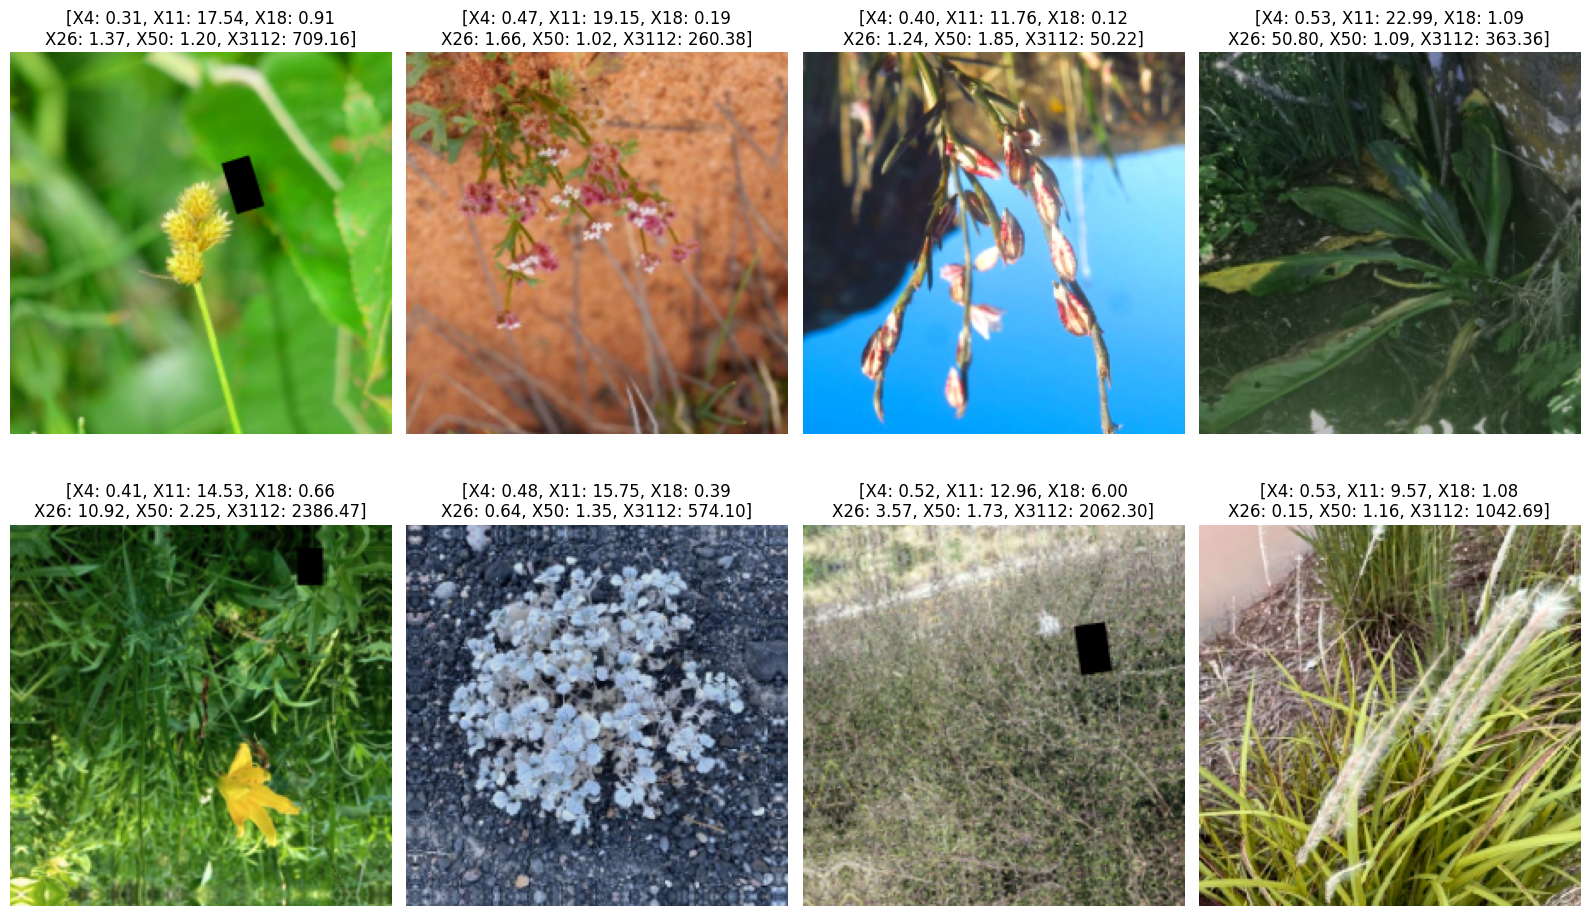

In [19]:
#En esta parte del código solo se mostrarán algunas de las imágenes que tenemos en el conj de datos junyo a sus etiquetas (valores X#_mean)

#Del objeto tf.dataset (pipeline) creamos un iterador (iterator) que nos servirá para acceder a los elementos del mismo y de ese iterador,
#obtenemos siempre el primer elemento del mismo (next)
#tars son los valores de las etiquetas (X#_mean)
#inps son los valores de las imágenes con embedding?
inps, tars = next(iter(train_ds))
#De arriba obtuvimos un diccionario que contenían las imágenes, entonces accedemos a ellas como tal
imgs = inps["images"]

#Empezamos con el proceso de grafica
#Definimos el tamaño del grid sobre el cual imprimiremos las imágenes
num_imgs, num_cols = 8, 4
#Creamos el objeto plot de acuerdo al tamño elegido arriba ("//" significa flotante de doble precisión. El tamaño final es 1600x1000
plt.figure(figsize = (4 * num_cols, num_imgs // num_cols * 5)) 
imaganes_aux = []
#Obtenemos las primeras 8 imágenes del conjunto y de ahí hacemos las parejas (zip) de sus valores inps con su valor tars
for i, (img, tar) in enumerate(zip(imgs[:num_imgs], tars[0][:num_imgs])):
    #Creamos el subplot de tamaño 2, 4, (variable)
    plt.subplot(num_imgs // num_cols, num_cols, i + 1)
    #Transformamos la imagen en un objeto numpy (ya no de tipo tf)
    img = img.numpy()
    #Transformamos el objeto tar en un objeto numpy (ya no de tipo tf)
    tar = tar.numpy()

    #Reescalamos la imagen para hacerla más pequeña con el fin de que coincida con las dimensiones permitidas en el subplot
    img = (img - img.min())/(img.max() + 1e-4)

    #Creamos la etiqueta que va a llevar cada imagen con el valor de sus etiquetas (X#_mean)
    formatted_tar = "\n".join(
        [
            ", ".join(
                #Quitamos la palabra "mean" de los nombres de las etiquetas y en cambio adjuntamos su valor puntual (de tar)
                f"{name.replace('_mean','')}: {val:.2f}"
                for name, val in zip(CFG.class_names[j : j + 3], tar[j : j + 3])
            )
            for j in range(0, len(CFG.class_names), 3)
        ]
    )

    #Mostramos la imagen
    plt.imshow(img)
    #Creamos el título de cada imagen de acuerdo al formato aplicado arriba
    plt.title(f"[{formatted_tar}]")
    #Ocultamos las leyendas de los axis de cada imagen
    plt.axis("off")

#Indicamos que queremos un diseño ajustado
plt.tight_layout()
#Mostramos la gráfica final
plt.show()

In [20]:
#En esta parte del código crearemos los objetos (funciones) para las métricas R2 de pérdida que nos ayudará a evaluar el modelo

#[https://keras.io/api/layers/base_layer/]

#Importamos la libreria "ops" de keras para abrir toda una librería de funciones estilo Numpy
from keras import ops

#Empezamos a crear el objeto para la función de pérdida (Loss)
#esto sirve para calcular la cantidad que el modelo debe buscar minimizar durante el entrenamiento
#Pasamos al modelo el argumento de un objeto de Loss cualquiera para poder iniciarlo
class R2Loss(keras.losses.Loss):
    #Función inicial en donde declaramos los parámetros principales 
    #La función mask nos ayuda a que, durante el proceso de entrenamiento, se salte aquellos registros que no tengan valor (valor nulo)
    def __init__(self, use_mask=False, name = "r2_loss"):
        #La función super significa que hereda todos los métodos y propiedades de otra clase
        super().__init__(name = name)
        #Declaramos el parámetro de utilizar máscara
        self.use_mask = use_mask

    #Función parta llamar laf función de R2Loss
    def call(self, y_true, y_pred):
        #Verificamos si es que el flag de utilizar mask es verdadero o falso
        if self.use_mask:
            #Van a fungir como máscaras aquellos valores de y_true que sean diferentes a -1, es decir, van a ser saltados. Aquí solo declaramos el booleano
            mask = (y_true != -1)
            #Aquí filtramos los valores de y_true que cumplan con la condición de arriba, si lo cumple, dejamos el valor tal cual está en y_true, sino, lo ponemos como cero
            y_true = ops.where(mask, y_true, 0.0)
            #Aquí filtramos los valores de y_pred que cumplan con la condición de arriba, si lo cumple, dejamos el valor tal cual está en y_pred, sino, lo ponemos como cero
            y_pred = ops.where(mask, y_pred, 0.0)

        #Aquí aplicamos el cálculo de SS_residual que es la suma de la resta de las y_true - y_pred al cuadrado
        SS_res = ops.sum(ops.square(y_true - y_pred), axis = 0)
        #Aquí aplicamos el cálculo de SS_total que es la suma de la resta de las y_true - el promedio de y_true, todo al cuadrado
        SS_tot = ops.sum(ops.square(y_true - ops.mean(y_true, axis = 0)), axis = 0)
        #Aquí ya hacemos la división de SS_residual / SS_total para obtener el cálculo final de R2_loss, en SS_total agregamos un epsilon para evitar divisiones entre cero
        r2_loss = SS_res / (SS_tot + 1e16)

        #Regresamos el promedio de R2_loss
        return ops.mean(r2_loss)

#Empezamos a crear el objeto para la función de la métrica de R2
#esto nos sirve para evaluar el desempeño del modelo que aplicaremos, aquí los resultados no se utilizan para entrenar el modelo (los resultados de la función Loss si)
class R2Metric(keras.metrics.Metric):
    #Aquí definimos el nombre de la métrica a utilizar (r2) y dejamos algunos argumentos abiertos para utilizar
    def __init__(self, name = "r2", **kwargs):
        #Heredamos la clase de R2Metric
        super(R2Metric, self).__init__(name = name, **kwargs)
        #Declaramos la propiedad SS_res mediante la función add_weight:
        #shape indica la forma que tendrá la tupla de la variable, no puede ser None
        #initializer indica un objeto iniciador que se utiliza para poblar los valores de la variable inicial, aquí elegimos iniciar con cero en todos
        #name indica simplemente el nombre del objeto para propósitos de reconocimiento durante el entrenamiento
        self.SS_res = self.add_weight(name = 'SS_res', shape = (6,), initializer = 'zeros')
        #Declaramos la propiedad SS_res mediante la función add_weight, los parámetros son los mismos a los de arriba, solo cambia el nombre del objeto
        self.SS_tot = self.add_weight(name = 'SS_tot', shape = (6,), initializer = 'zeros')
        ##Declaramos la propiedad num_samples mediante la función add_weight, los parámetros son los mismos a los de arriba, solo cambia el nombre del objeto
        self.num_samples = self.add_weight(name = 'num_samples', initializer = 'zeros')

    #Función para actualizar el estado
    def update_state(self, y_true, y_pred, sample_weight = None):
        #Realizamos el cálculo de SS_res (suma de la resta de las y_true - y_pred al cuadrado)
        SS_res = ops.sum(ops.square(y_true - y_pred), axis = 0)
        #Realizamos el cálculo de SS_tot (suma de la resta de las y_true - el promedio de y_true, todo al cuadrado)
        SS_tot = ops.sum(ops.square(y_true - ops.mean(y_true, axis = 0)), axis = 0)
        #Agregamos el valor de SS_res al tensor variable
        #[https://www.tensorflow.org/api_docs/python/tf/Variable#assign_add]8
        self.SS_res.assign_add(SS_res)
        #Agregamos el valor de SS_tot al tensor variable
        self.SS_tot.assign_add(SS_tot)
        #Agregamos el valor de num_samples al tensor variable. Aquí asignamos el valor del tamaño del tensor (solo el primer valor)
        self.num_samples.assign_add(ops.cast(ops.shape(y_true)[0], "float32"))

    #Función para calcular el valor final de la métrica R2
    def result(self):
        #Calculamos el valor de r2, que es la división de SS_res / SS_tot (agregamos un epsilon a SS_tot para evitar divisiones entre cero)
        r2 = 1 - self.SS_res / (self.SS_tot + 1e-6)
        #Regresamos la media del valor R2
        return ops.mean(r2)

    #Función para resetear los valores de los parámetros, todos ellos se les asignará el valor de cero para resetearlos
    def reset_states(self):
        #Asignamos un nuevo valor de SS_res al tensor variable, en este caso el nuevo valor es cero
        #[https://www.tensorflow.org/api_docs/python/tf/Variable#assign]
        self.total_SS_res.assign(0)
        #Asignamos un nuevo valor de SS_tot al tensor variable, en este caso el nuevo valor es cero
        self.total_SS_tot.assign(0)
        #Asignamos un nuevo valor de num_samples al tensor variable, en este caso el nuevo valor es cero
        self.num_samples.assign(0)

In [21]:
#En esta parte del código se construirá y compilará el modelo que utilizaremos en todo el proceso (EfficientNetV2 B2 + Dense)